In [3]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
import umap # type: ignore

In [4]:
label = np.array(['HIA', 'OB', 'p-gp inhibitor', 'p-gp substrates', 'BBB',
       'Respiratory toxicity', 'Hepatotoxicity', 'half-life', 'CL',
       'Cardiotoxicity1', 'Cardiotoxicity10', 'Cardiotoxicity30',
       'Cardiotoxicity5', 'CYP1A2', 'CYP2C19', 'CYP2C9', 'CYP2D6', 'CYP3A4',
       'Acute oral toxicity (LD50)', 'IGC50', 'ESOL', 'logD',
       'Caco-2 permeability', 'PPB'])
binary = np.array([True]*18 + [False]*6)

In [5]:
data = pd.read_csv("admet_embeddings.csv")
RS = 23

In [6]:
features = data['embeddings'].apply(lambda x : np.array(x.replace('[','').replace(']','').split(), dtype=float))

In [23]:
mlist = features.to_list()

In [50]:
labels = np.zeros(len(mlist))
for i in range(len(label)):
    labels[data[label[i]].dropna().index] = i

In [51]:
labels

array([ 0.,  0.,  0., ..., 23., 23., 23.])

In [ ]:
np.concatenate(features.values)

(23019008,)

In [78]:
mapper = umap.UMAP(n_components=3, n_neighbors=100).fit(np.array(mlist))

In [79]:
import umap.plot


In [80]:
#umap.plot.connectivity(mapper, edge_bundling='hammer')

In [81]:
data_transformed = mapper.transform(np.array(mlist))

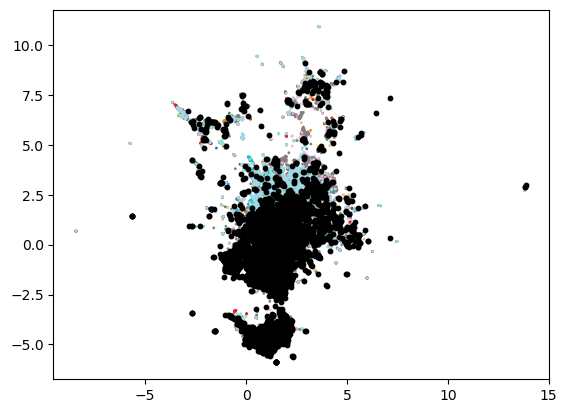

In [85]:
plt.scatter(data_transformed[:,0], data_transformed[:,2], s = 1, c = labels, cmap='tab20')
plt.scatter(data_transformed[:,0][labels==18.0], data_transformed[:,2][labels==18.0], c = "k", s = 10)

In [86]:
mlist[0]

array([-7.87911355e-01,  2.04224482e-01, -5.84124565e-01, -6.01534724e-01,
       -9.21811312e-02, -3.42294693e-01,  5.42150140e-01, -4.93622780e-01,
        1.93602461e-02, -2.17538491e-01, -1.97835758e-01, -2.09971726e-01,
       -4.60024416e-01, -7.43014812e-02, -2.19192088e-01,  3.66442442e-01,
       -1.14214875e-01,  1.17131971e-01,  3.32964897e-01,  3.51524085e-01,
        5.12818024e-02, -3.68823290e-01, -3.23343612e-02, -5.12261204e-02,
        7.12909177e-02,  5.48504233e-01, -1.28484145e-01, -5.56214988e-01,
       -1.57520026e-01,  3.32434833e-01,  4.44960833e-01, -4.96988967e-02,
       -2.01512486e-01, -5.46561956e-01,  6.27466798e-01, -2.55302221e-01,
       -1.88342109e-01, -2.07377657e-01,  7.44893610e-01, -1.02136306e-01,
       -9.52480257e-01, -9.20926392e-01, -9.91596580e-02,  4.88856137e-02,
       -3.94507468e-01, -9.93573129e-01,  9.35057998e-02, -1.08538277e-01,
       -4.17374909e-01, -6.22110844e-01, -1.69816688e-01,  3.75815481e-01,
       -5.32275319e-01,  